# <div align="center">CP322-A Mini-Project 3: Machine Learning</div>
## <div align="center">Group 6</div>
### <div align="center">due on 10-Dec-2023 at 11:30 PM</div>

Imports:

In [1]:
# conda install pytorch torchvision torchaudio -c pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

## Load Dataset: CIFAR10

In [2]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the data
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Set up data loaders
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

Using downloaded and verified file: ./data\cifar-10-python.tar.gz
Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


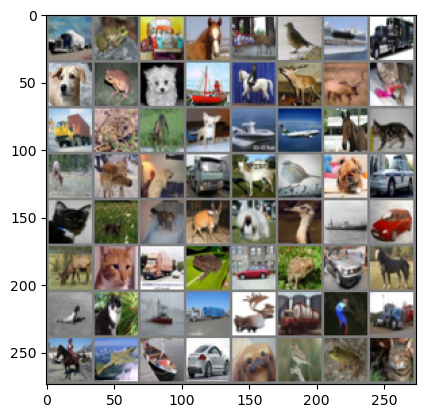

truck frog  truck horse


In [24]:
import matplotlib.pyplot as plt
import numpy as np
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# functions to show an image
batch_size = 4

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## ANN Model

In [3]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)  # Input size is 32x32x3, output size is 512
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)  # Output size is 10 (number of classes in CIFAR-10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the input
        x = torch.relu(self.fc1(x)) 
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training the model
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 200}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the network on the test images: {100 * accuracy}%')

Epoch 1, Mini-batch 200, Loss: 2.293365144729614
Epoch 1, Mini-batch 400, Loss: 2.257921214103699
Epoch 1, Mini-batch 600, Loss: 2.184755572080612
Epoch 2, Mini-batch 200, Loss: 2.0018887764215467
Epoch 2, Mini-batch 400, Loss: 1.92741865336895
Epoch 2, Mini-batch 600, Loss: 1.8813273900747298
Epoch 3, Mini-batch 200, Loss: 1.8024295330047608
Epoch 3, Mini-batch 400, Loss: 1.7619384723901748
Epoch 3, Mini-batch 600, Loss: 1.7256797862052917
Epoch 4, Mini-batch 200, Loss: 1.6705574268102645
Epoch 4, Mini-batch 400, Loss: 1.6550963592529297
Epoch 4, Mini-batch 600, Loss: 1.6451716667413712
Epoch 5, Mini-batch 200, Loss: 1.584107558131218
Epoch 5, Mini-batch 400, Loss: 1.587294219136238
Epoch 5, Mini-batch 600, Loss: 1.567991936802864
Epoch 6, Mini-batch 200, Loss: 1.5251085698604583
Epoch 6, Mini-batch 400, Loss: 1.4983007889986037
Epoch 6, Mini-batch 600, Loss: 1.4993218451738357
Epoch 7, Mini-batch 200, Loss: 1.449132930636406
Epoch 7, Mini-batch 400, Loss: 1.433472729921341
Epoch 7, M

## CNN Model

#### Define a Convolutional Neural Network

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 output channels, kernel size 5x5
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer with kernel size 2x2 and stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)  # 6 input channels, 16 output channels, kernel size 5x5
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Input size 16*5*5, output size 120
        self.fc2 = nn.Linear(120, 84)  # Input size 120, output size 84
        self.fc3 = nn.Linear(84, 10)  # Input size 84, output size 10 (for classification)
        
    def forward(self, x):
        # Forward propagation of the network
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = torch.flatten(x, 1)  # Flatten the tensor except for the batch dimension
        x = torch.relu(self.fc1(x))  # Fully connected layer 1 -> ReLU
        x = torch.relu(self.fc2(x))  # Fully connected layer 2 -> ReLU
        x = self.fc3(x)  # Final fully connected layer (output layer)
        return x

# Create an instance of the CNN model
cnnModel = CNN()

#### Define a Convolutional Neural Network

In [16]:
# Define the criterion (loss function) for the model: 
# Sets up the criterion to measure the model's prediction accuracy 
# against actual target values during training, specifically used 
# for classification tasks.
criterion = nn.CrossEntropyLoss()


# Define the optimizer for updating model parameters during training: 
# Initializes the optimizer (Stochastic Gradient Descent - SGD) responsible
# for adjusting the model's weights based on the computed loss, using a learning 
# rate of 0.001 and a momentum value of 0.9.
optimizer = optim.SGD(cnnModel.parameters(), lr=0.001, momentum=0.9)

#### Train the Network

In [18]:
for epoch in range(2):  # Loop over the dataset for a set number of epochs

    running_loss = 0.0  # Variable to keep track of the running loss for each epoch
    for i, data in enumerate(train_loader, 0):
        # `data` is a list of [inputs, labels]
        inputs, labels = data  # Unpack the input data and corresponding labels

        # Reset the gradients to zero
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = cnnModel(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)  # Compare model's output to actual labels

        # Backpropagation: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Update the weights
        optimizer.step()

        # Keep track of the total loss
        running_loss += loss.item()

        # Print statistics every 200 mini-batches
        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0  # Reset the running loss

print('Finished Training')  # Indicate the completion of training after looping through all epochs

[1,   200] loss: 0.193
[1,   400] loss: 0.189
[1,   600] loss: 0.184
[2,   200] loss: 0.174
[2,   400] loss: 0.170
[2,   600] loss: 0.167
Finished Training


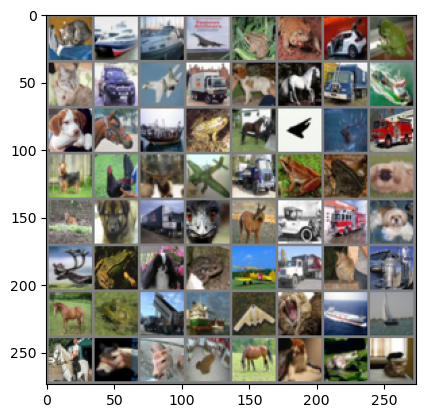

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  ship  ship 


In [36]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = cnnModel(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [35]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cnnModel(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 41 %
Accuracy for class: plane is 46.6 %
Accuracy for class: car   is 75.3 %
Accuracy for class: bird  is 20.0 %
Accuracy for class: cat   is 37.2 %
Accuracy for class: deer  is 33.0 %
Accuracy for class: dog   is 21.8 %
Accuracy for class: frog  is 48.6 %
Accuracy for class: horse is 51.3 %
Accuracy for class: ship  is 40.8 %
Accuracy for class: truck is 41.1 %
